In [1]:
#Importing the libraries

import pandas as pd
import numpy as np
import sweetviz as sv
from ydata_profiling import ProfileReport

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

C:\Users\jagat\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
#Preparing the Data Frame

df = df = pd.read_csv("C:\\Datasets\\Pokemon Data.csv")

In [3]:
#Some Standard EDA

report = sv.analyze(df)
report.show_html('report.html')

                                             |                                             | [  0%]   00:00 ->…

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


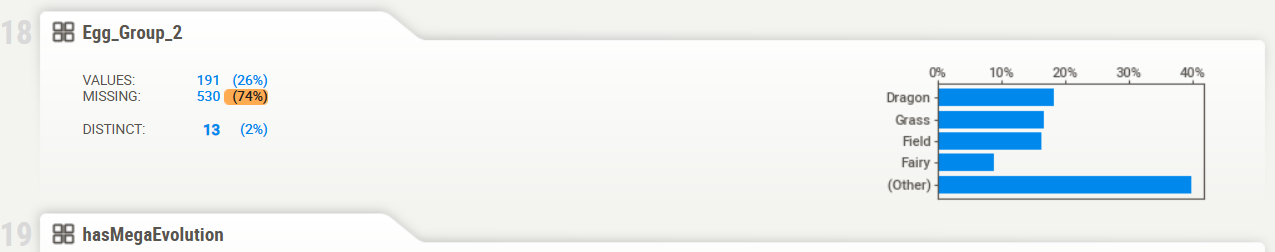
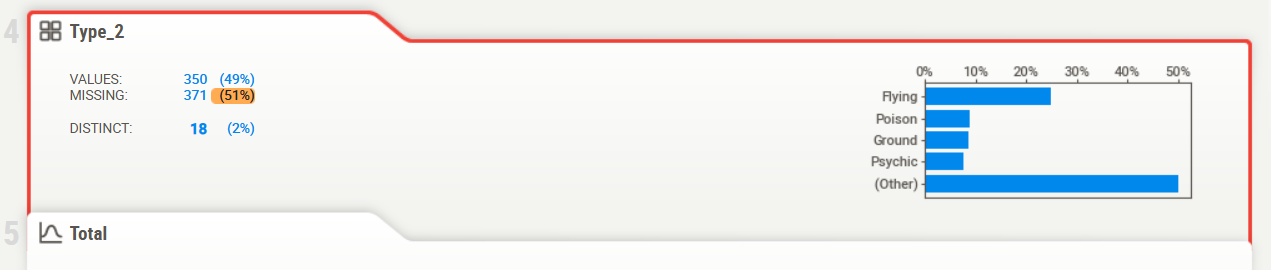

In [4]:
profile = ProfileReport(df, title="Report Title")
profile.to_file("report2.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

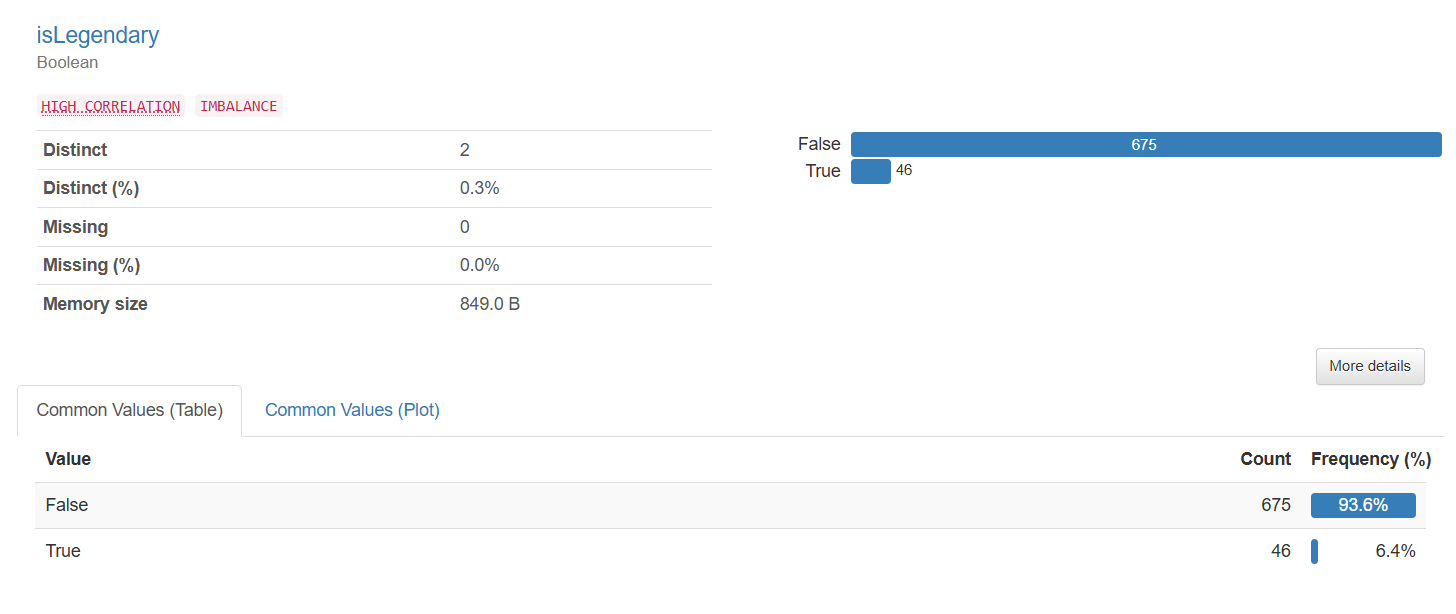

In [3]:
# From the basic EDA we get some rough idea that Egg_Group_2 and Type_2 are most likely not going to be able to help us in
# identifying if our Pokemon is Legendary or Not as more than 50% of their values are missing, moreover the Name and Number 
# of the Pokemon is not going to be of any use to us, sure they can act as primary keys but for now they don't serve much 
# purpose. Hence, let's start by dropping these 4 columns for now.

In [5]:
# Original DataSet head
df.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


In [3]:
df = df.drop(["Type_2", "Number", "Name", "Egg_Group_2"], axis = 1)

In [4]:
# After Dropping These Columns

df.head()

,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Egg_Group_1,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,Grass,318,45,49,49,65,65,45,1,False,Green,True,0.875,Monster,False,0.71,6.9,45,quadruped
1,Grass,405,60,62,63,80,80,60,1,False,Green,True,0.875,Monster,False,0.99,13.0,45,quadruped
2,Grass,525,80,82,83,100,100,80,1,False,Green,True,0.875,Monster,True,2.01,100.0,45,quadruped
3,Fire,309,39,52,43,60,50,65,1,False,Red,True,0.875,Monster,False,0.61,8.5,45,bipedal_tailed
4,Fire,405,58,64,58,80,65,80,1,False,Red,True,0.875,Monster,False,1.09,19.0,45,bipedal_tailed


In [9]:
# Now from the EDA we also saw that Pr_Male also has some missing values, but they are not so much that we can't try to fix,
# plus with less that 1% of distinct values we can safely say a lot of values are repeated, let's take a look.

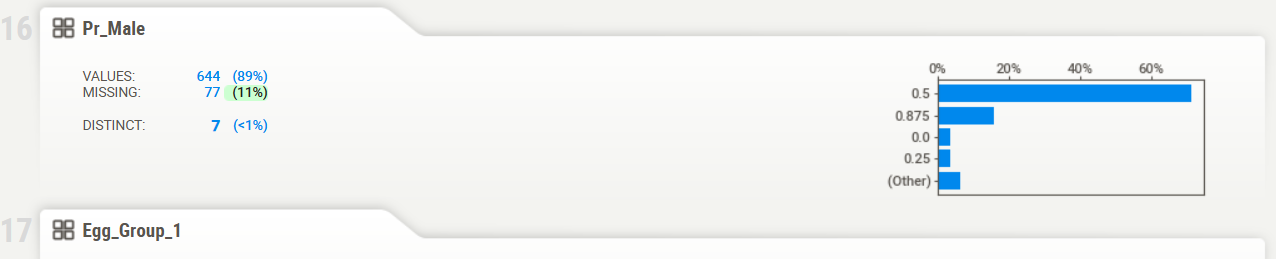

In [5]:
value_counts = df["Pr_Male"].value_counts()
print(value_counts)

Pr_Male
0.500    458
0.875    101
0.000     23
0.250     22
1.000     19
0.750     19
0.125      2
Name: count, dtype: int64


In [6]:
# As we can clearly see the 0.500 occurs more than 60% of time, let's fill up the null values with it only, we can either insert
# it directly or fill in using median function

df["Pr_Male"].fillna(df["Pr_Male"].median(), inplace = True)
print(df["Pr_Male"].isnull().sum())

0


C:\Users\jagat\AppData\Local\Temp\ipykernel_19360\2595241366.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Pr_Male"].fillna(df["Pr_Male"].median(), inplace = True)


In [14]:
# Now let's get a description of dataframe, point to note this works only for columns made up of numerical data

df.describe()

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Pr_Male,Height_m,Weight_kg,Catch_Rate
count,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000
mean,417.945908,68.380028,75.013870,70.808599,68.737864,69.291262,65.714286,3.323162,0.547677,1.144979,56.773370,100.246879
std,109.663671,25.848272,28.984475,29.296558,28.788005,27.015860,27.277920,1.669873,0.189693,1.044369,89.095667,76.573513
min,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,0.000000,0.100000,0.100000,3.000000
25%,320.000000,50.000000,53.000000,50.000000,45.000000,50.000000,45.000000,2.000000,0.500000,0.610000,9.400000,45.000000
50%,424.000000,65.000000,74.000000,65.000000,65.000000,65.000000,65.000000,3.000000,0.500000,0.990000,28.000000,65.000000
75%,499.000000,80.000000,95.000000,85.000000,90.000000,85.000000,85.000000,5.000000,0.500000,1.400000,61.000000,180.000000
max,720.000000,255.000000,165.000000,230.000000,154.000000,230.000000,160.000000,6.000000,1.000000,14.500000,950.000000,255.000000


<AxesSubplot:>

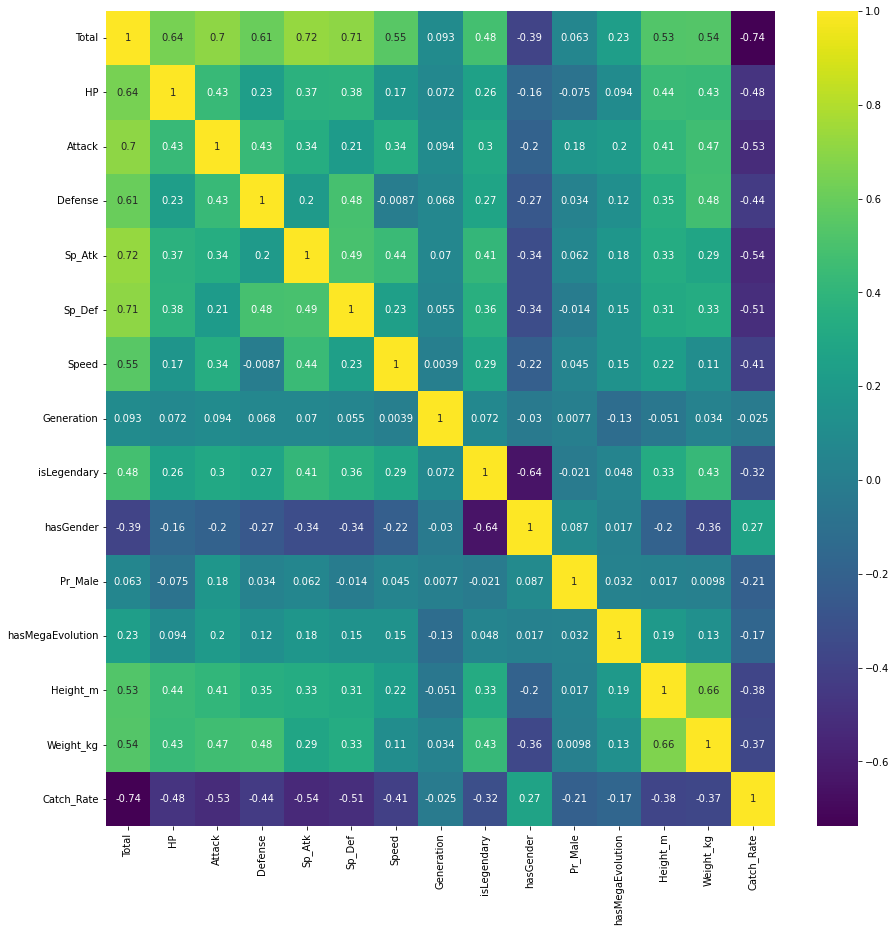

In [7]:
# As per me there doesn't seem to be much need for normalizing at the moment as there in no single column which has too much of
# difference from all the others on all the features so let's move on to finding some correlations and for better
# understanding we will do this using a heatmap but first let's temporarily not consider Color, Type_1, Egg_Group_1 
# and Body_Style as they are String

plt.figure(figsize = (15,15))
df_heatmap = df.drop(["Type_1", "Color", "Egg_Group_1", "Body_Style"], axis = 1)


sns.heatmap(df_heatmap.corr(), annot = True, cmap = "viridis")

In [26]:
# As we can see isLegendary has an inverse relation with hasGender and Catch_Rate, maybe this can be useful in predicting later
# as direct relations alone are not very strong in our case

# Let's shift our attention to the categorical data for now, from our basic EDA we already have some insights for color, type_1
# Egg_Group_1 and Body_Style

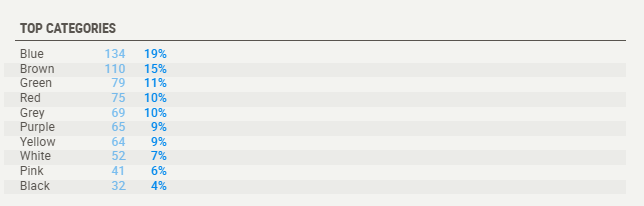

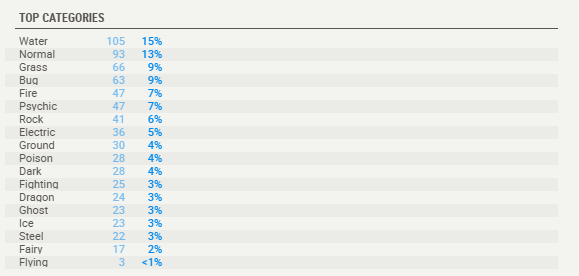

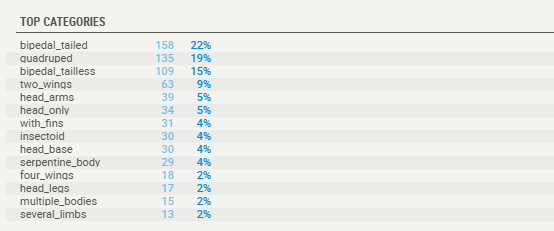

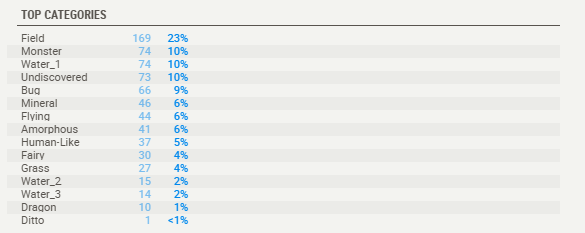

In [11]:
df.columns

Index(['Type_1', 'Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def',
       'Speed', 'Generation', 'isLegendary', 'Color', 'hasGender', 'Pr_Male',
       'Egg_Group_1', 'hasMegaEvolution', 'Height_m', 'Weight_kg',
       'Catch_Rate', 'Body_Style'],
      dtype='object')

In [12]:
# Let's us do one thing, make the type as new columns itself, such that if a Pokemon is of a certain type then it will have
# 1 in that column of type of Pokemon else 0

df = df.join(pd.get_dummies(df["Type_1"]).astype(int))

df.head()

,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,...,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,Grass,318,45,49,49,65,65,45,1,False,...,0,1,0,0,0,0,0,0,0,0
1,Grass,405,60,62,63,80,80,60,1,False,...,0,1,0,0,0,0,0,0,0,0
2,Grass,525,80,82,83,100,100,80,1,False,...,0,1,0,0,0,0,0,0,0,0
3,Fire,309,39,52,43,60,50,65,1,False,...,0,0,0,0,0,0,0,0,0,0
4,Fire,405,58,64,58,80,65,80,1,False,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Now let's do similar with the body type but first let's drop the Type_1 Column as it is not useful anymore

df = df.drop(["Type_1"], axis = 1)

#Now let's make body_style as an columns as well

df_body = pd.get_dummies(df["Body_Style"]).astype(int)
df = df.join(df_body)
df = df.drop(["Body_Style"], axis = 1)


df.head()

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,...,head_base,head_legs,head_only,insectoid,multiple_bodies,quadruped,serpentine_body,several_limbs,two_wings,with_fins
0,318,45,49,49,65,65,45,1,False,Green,...,0,0,0,0,0,1,0,0,0,0
1,405,60,62,63,80,80,60,1,False,Green,...,0,0,0,0,0,1,0,0,0,0
2,525,80,82,83,100,100,80,1,False,Green,...,0,0,0,0,0,1,0,0,0,0
3,309,39,52,43,60,50,65,1,False,Red,...,0,0,0,0,0,0,0,0,0,0
4,405,58,64,58,80,65,80,1,False,Red,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df.columns

Index(['Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed',
       'Generation', 'isLegendary', 'Color', 'hasGender', 'Pr_Male',
       'Egg_Group_1', 'hasMegaEvolution', 'Height_m', 'Weight_kg',
       'Catch_Rate', 'Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting',
       'Fire', 'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison',
       'Psychic', 'Rock', 'Steel', 'Water', 'bipedal_tailed',
       'bipedal_tailless', 'four_wings', 'head_arms', 'head_base', 'head_legs',
       'head_only', 'insectoid', 'multiple_bodies', 'quadruped',
       'serpentine_body', 'several_limbs', 'two_wings', 'with_fins'],
      dtype='object')

In [66]:
#df = df.T.drop_duplicates().T

In [15]:
# We have got a lot of features for trial run, so let's skip the Color and Egg_Group_1, color because every Pokemon lover knows
# That color has no role in being legendary or not and Egg_Group_1 as this seems less relevant in comparison to HP, Total, etc.

df = df.drop(["Color", "Egg_Group_1"], axis = 1)

In [16]:
# Let's Set the target and the prepare to train

y = df['isLegendary']
x = df.drop(['isLegendary'], axis = 1)

In [17]:
# Train Test Split to train on 80% of our data

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)
ytrain = ytrain.astype(int)
ytest = ytest.astype(int)

In [18]:
# We will use Random Forest Classifier

random_model = RandomForestClassifier(n_estimators=500, random_state = 42)

In [19]:
# Fitting the model

model_final = random_model.fit(xtrain, ytrain)

#Checking the accuracy on training data
random_model_accuracy = round(model_final.score(xtrain, ytrain)*100,2)
print(round(random_model_accuracy, 2), '%')

100.0 %


In [20]:
# For testing Data

random_model_accuracy1 = round(random_model.score(xtest, ytest)*100,2)
print(round(random_model_accuracy1, 2), '%')

99.31 %


In [21]:
# These are great accuracies, so let's try to predict with a Pokemon of our Choice 1 legendary and 1 Non-legendary

df.columns

Index(['Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed',
       'Generation', 'isLegendary', 'hasGender', 'Pr_Male', 'hasMegaEvolution',
       'Height_m', 'Weight_kg', 'Catch_Rate', 'Bug', 'Dark', 'Dragon',
       'Electric', 'Fairy', 'Fighting', 'Fire', 'Flying', 'Ghost', 'Grass',
       'Ground', 'Ice', 'Normal', 'Poison', 'Psychic', 'Rock', 'Steel',
       'Water', 'bipedal_tailed', 'bipedal_tailless', 'four_wings',
       'head_arms', 'head_base', 'head_legs', 'head_only', 'insectoid',
       'multiple_bodies', 'quadruped', 'serpentine_body', 'several_limbs',
       'two_wings', 'with_fins'],
      dtype='object')

Given the columns we have, here's how we should structure the input data for Moltres:

Total: 580
HP: 90
Attack: 100
Defense: 90
Sp_Atk: 125
Sp_Def: 85
Speed: 90
Generation: 1
isLegendary: We leave this out because it's what we're predicting.
hasGender: 0 (Since Moltres is genderless, according to the data)
Pr_Male: 0 (No male gender probability for genderless Pokémon)
hasMegaEvolution: 0 (Moltres does not have a Mega Evolution)
Height_m: 2.01
Weight_kg: 60
Catch_Rate: 3
For the type and body style columns, we set the value to 1 if the Pokémon has that type or body style, otherwise 0:

Bug: 0
Dark: 0
Dragon: 0
Electric: 0
Fairy: 0
Fighting: 0
Fire: 1 (Moltres is Fire type)
Flying: 0 (Remember we dropped the type_2)
Ghost: 0
Grass: 0
Ground: 0
Ice: 0
Normal: 0
Poison: 0
Psychic: 0
Rock: 0
Steel: 0
Water: 0
For the body style:

bipedal_tailed: 0
bipedal_tailless: 0
four_wings: 0
head_arms: 0
head_base: 0
head_legs: 0
head_only: 0
insectoid: 0
multiple_bodies: 0
quadruped: 0
serpentine_body: 0
several_limbs: 0
two_wings: 1 (Moltres has two wings)
with_fins: 0

In [22]:
input_data = pd.DataFrame({
    'Total': [580],
    'HP': [90],
    'Attack': [100],
    'Defense': [90],
    'Sp_Atk': [125],
    'Sp_Def': [85],
    'Speed': [90],
    'Generation': [1],
    'hasGender': [0],  # Assuming 'FALSE' translates to 0
    'Pr_Male': [0.0],  # No gender, so probability male is 0
    'hasMegaEvolution': [0],  # Assuming 'FALSE' translates to 0
    'Height_m': [2.01],
    'Weight_kg': [60.0],
    'Catch_Rate': [3],

    # Types
    'Bug': [0],
    'Dark': [0],
    'Dragon': [0],
    'Electric': [0],
    'Fairy': [0],
    'Fighting': [0],
    'Fire': [1],    # Moltres is Fire type
    'Flying': [1],  # Moltres is Flying type
    'Ghost': [0],
    'Grass': [0],
    'Ground': [0],
    'Ice': [0],
    'Normal': [0],
    'Poison': [0],
    'Psychic': [0],
    'Rock': [0],
    'Steel': [0],
    'Water': [0],

    # Body Styles
    'bipedal_tailed': [0],
    'bipedal_tailless': [0],
    'four_wings': [0],
    'head_arms': [0],
    'head_base': [0],
    'head_legs': [0],
    'head_only': [0],
    'insectoid': [0],
    'multiple_bodies': [0],
    'quadruped': [0],
    'serpentine_body': [0],
    'several_limbs': [0],
    'two_wings': [1],  # Moltres has two wings
    'with_fins': [0]
})

#Let's Get our Prediction

prediction = model_final.predict(input_data)
print("Is the Pokémon Legendary?", "Yes" if prediction[0] else "No")

#Let's also check how sure our model is of his answer

probability = model_final.predict_proba(input_data)
legendary_prob = probability[0][1]  # Probability of being Legendary
print(f"Probability of being Legendary: {legendary_prob * 100:.2f}%")

Is the Pokémon Legendary? Yes
Probability of being Legendary: 80.60%


In [ ]:
# Which is indeed correct as Moltres is a Legendary Pokemon, you can try out tweaking with the values and seeing the results
# for different Pokemon or try creating a GUI to make inputs easier, I am moving on to make a dashbord.

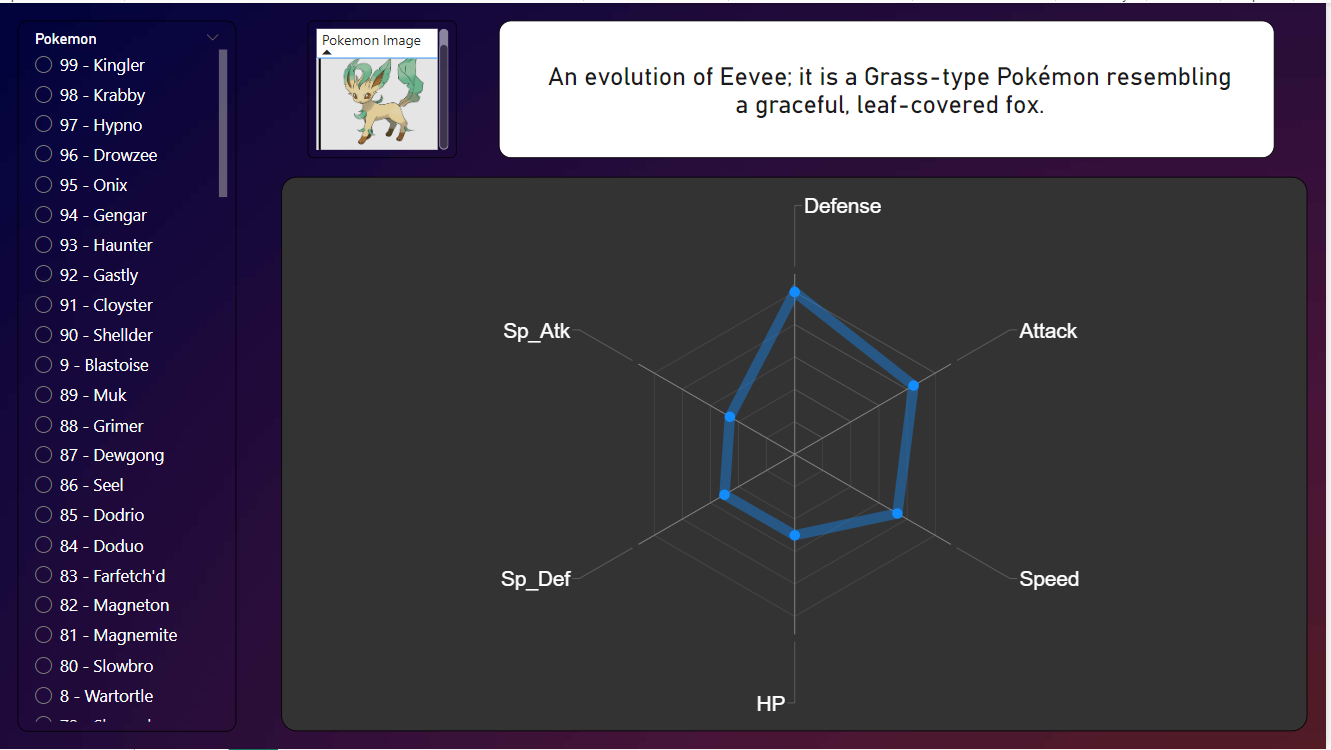